In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier

D:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
from sklearn.metrics import classification_report, confusion_matrix

In [9]:
import timeit

In [3]:
data = pd.read_csv('pimaIndiansDiabetes.csv')
data.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [4]:
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()
X = data.drop('1', axis=1)
stdScaler.fit(X)
Xscaled = stdScaler.transform(X)
Xscaled = pd.DataFrame(data = Xscaled, columns = X.columns)

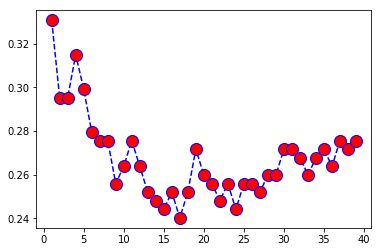

In [5]:


y = data['1']
X_train, X_test, y_train, y_test = train_test_split(Xscaled, y, test_size = 0.33, random_state = 42)
errorRate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    errorRate.append(np.mean(prediction != y_test))
    
plt.plot(range(1,40), errorRate, color='blue', linestyle='dashed', marker='o',
     markerfacecolor='red', markersize=12)

In [10]:
startTime = timeit.default_timer()
knn = KNeighborsClassifier(n_neighbors = 17)#choosing 17 from the graph
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
elapsed = timeit.default_timer()
print("time taken : ", elapsed)

time taken :  0.01557126214326393


In [8]:
print(confusion_matrix(y_test, prediction))
print ('\n')
print(classification_report(y_test, prediction))

[[154  15]
 [ 46  39]]


             precision    recall  f1-score   support

          0       0.77      0.91      0.83       169
          1       0.72      0.46      0.56        85

avg / total       0.75      0.76      0.74       254

